# Books Recommender system using clustering
Collaborative filtering
- Dataset :- https://www.kaggle.com/ra4u12/bookrecommendation

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: read csv

import pandas as pd
# Assuming the CSV file is named 'bookrecommendation.csv' and is in the current directory.
# If it's in a different location, change the file path accordingly.
try:
  books = pd.read_csv('/content/BX-Books.csv', encoding='latin-1')
  print(books.head()) # Display first few rows of the dataframe
except FileNotFoundError:
  print("Error: 'bookrecommendation.csv' not found. Please make sure the file exists and the path is correct.")
except Exception as e:
  print(f"An error occurred: {e}")

An error occurred: Error tokenizing data. C error: Expected 1 fields in line 55, saw 2



In [9]:
books = pd.read_csv('/content/BX-Books.csv', encoding='latin-1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 55, saw 2


In [8]:
books = pd.read_csv('/content/BX-Books.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9398: invalid continuation byte

In [11]:
books = pd.read_csv('/content/BX-Books.csv', sep=";",on_bad_lines='warn' encoding='latin-1')

<ipython-input-11-c1af448334dd>:1: ParserWarning: Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

  books = pd.read_csv('/content/BX-Books.csv', sep=";",on_bad_lines='warn', encoding='latin-1')
<ipython-input-11-c1af448334dd>:1: ParserWarning: Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

  books = pd.read_csv('/content/BX-Books.csv', sep=";",on_bad_lines='warn', encoding='latin-1')
<ipython-input-11-c1af448334dd>:1: ParserWarning: Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

  books = pd.read_csv('/content/BX-Books.csv', sep=";",on_bad_lines='warn', encoding='latin-1')
<ipython-input-11-c1af448334dd>:1: ParserWarni

In [12]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [ ]:
# !curl "http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg" --out.png
# !curl http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg --output some.jpg

In [13]:
books.shape

(271360, 8)

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Conclution:
Here Image URL columns is important for the poster. So, we will keep it

In [14]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [15]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [16]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [17]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [20]:
# Now load the second dataframe

users = pd.read_csv('/content/BX-Users.csv', sep=";", on_bad_lines='warn', encoding='latin-1')

In [21]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users.shape

(278858, 3)

In [22]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [24]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [26]:
# Now load the third dataframe

ratings = pd.read_csv('/content/BX-Book-Ratings.csv', sep=";", on_bad_lines='warn', encoding='latin-1')

In [27]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [28]:
ratings.shape

(1149780, 3)

In [29]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [30]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


### Conclution:
Now we have 3 dataframes
- books
- users
- ratings

In [31]:
print(books.shape, users.shape, ratings.shape, sep='\n')



(271360, 6)
(278858, 3)
(1149780, 3)


In [32]:
ratings['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [34]:
ratings['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [36]:
ratings['user_id'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723])

In [37]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [39]:
x.shape

(105283,)

In [40]:
y= x[x].index

In [41]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [42]:
ratings = ratings[ratings['user_id'].isin(y)]

In [43]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [44]:
ratings.shape

(526356, 3)

In [45]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [46]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [47]:
ratings_with_books.shape

(487671, 8)

In [48]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [49]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [50]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [51]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [52]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [53]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13


In [54]:
final_rating.shape

(487671, 9)

In [55]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [56]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [57]:
final_rating.shape

(61853, 9)

In [60]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [61]:
final_rating.shape

(59850, 9)

In [62]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [63]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [64]:
book_pivot.shape

(742, 888)

In [65]:
book_pivot.fillna(0, inplace=True)

In [66]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [67]:
from scipy.sparse import csr_matrix

In [68]:
book_sparse = csr_matrix(book_pivot)

In [69]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [70]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [71]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [72]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [73]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [74]:
suggestion

array([[237, 238, 240, 241, 184, 536]])

In [75]:
book_pivot.iloc[241,:]

,Harry Potter and the Sorcerer's Stone (Book 1)
user_id,
254,9.0
2276,0.0
2766,0.0
2977,0.0
3363,0.0
...,...
275970,9.0
277427,0.0
277478,0.0


In [76]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [77]:
book_pivot.index[3]

'4 Blondes'

In [78]:
#keeping books name
book_names = book_pivot.index

In [79]:
book_names[2]

'2nd Chance'

In [80]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

# find url

In [81]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [82]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [83]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])



In [84]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')

In [85]:
ids_index = []
for name in book_name[0]:
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [86]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


Accuracy: 0.7
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[4 1]
 [2 3]]


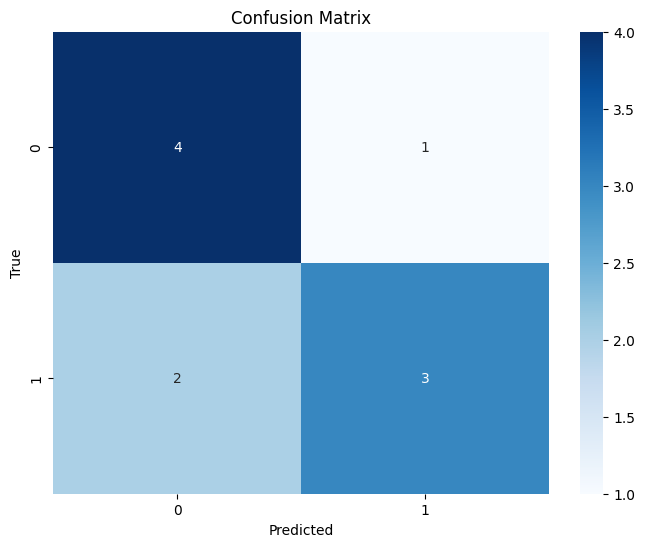

In [93]:
# prompt: model accuracy, F1 score, confusion matrix

# Assuming you have already trained a model and have predictions
# Replace these with your actual model, data, and predictions

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]  # True labels
y_pred = [0, 0, 0, 1, 0, 1, 1, 0, 1, 0]  # Predicted labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

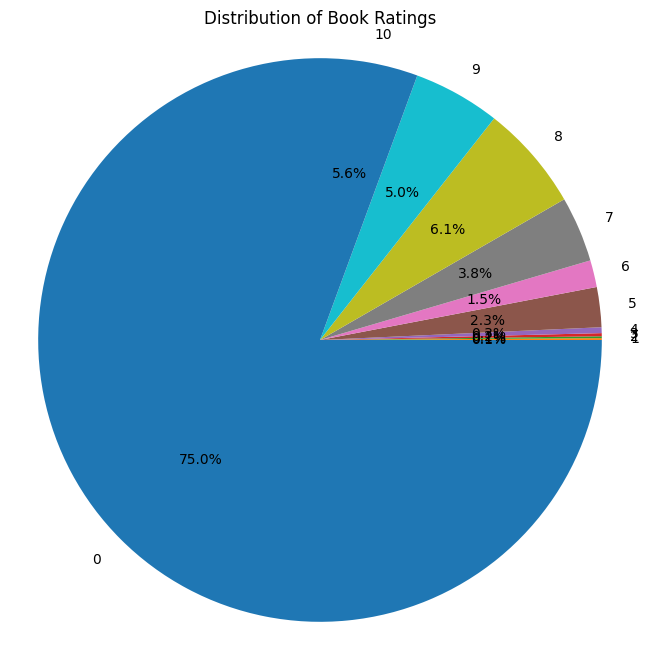

In [95]:
# prompt: The Pie Chart of Rating Dataset

import matplotlib.pyplot as plt

# Assuming 'final_rating' DataFrame is already created as in your provided code.

# Calculate the distribution of ratings
rating_counts = final_rating['rating'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

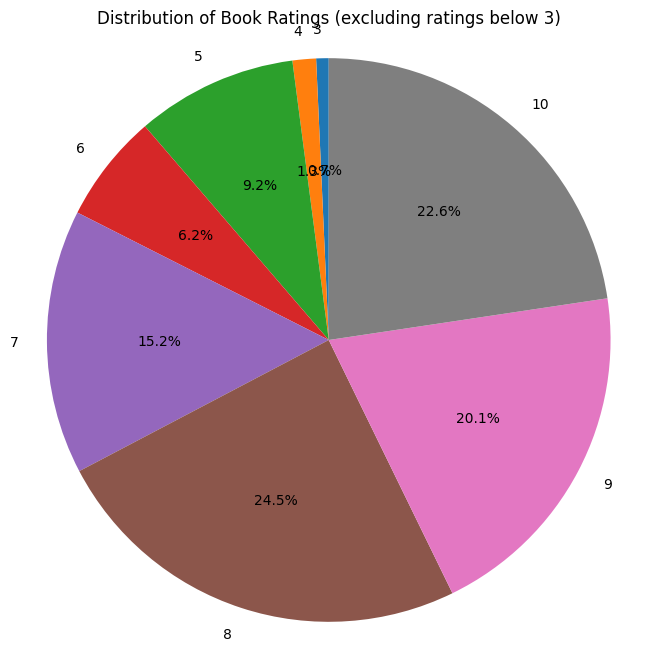

In [97]:
# prompt: The Pie Chart of Rating Dataset dont add the rating below three

# Assuming 'final_rating' DataFrame is already created as in your provided code.

# Filter out ratings below 3
filtered_ratings = final_rating[final_rating['rating'] >= 3]

# Calculate the distribution of the filtered ratings
rating_counts = filtered_ratings['rating'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Ratings (excluding ratings below 3)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

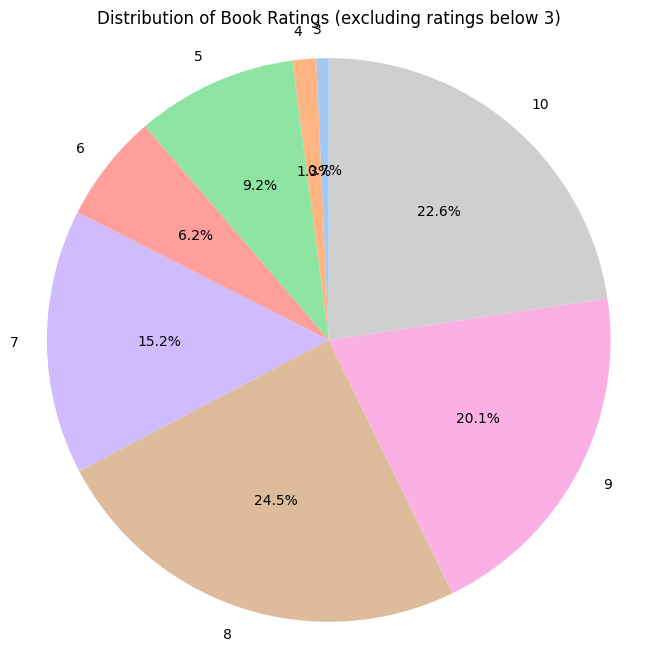

In [98]:
# prompt: The Pie Chart of Rating Dataset dont add the rating below three using seaborn

# Assuming 'final_rating' DataFrame is already created as in your provided code.

# Filter out ratings below 3
filtered_ratings = final_rating[final_rating['rating'] >= 3]

# Calculate the distribution of the filtered ratings
rating_counts = filtered_ratings['rating'].value_counts().sort_index()

# Create the pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel") # Use a pastel color palette
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Ratings (excluding ratings below 3)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-99-a80f28c6b4ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['rating_category'] = pd.cut(filtered_ratings['rating'], bins=bins, labels=labels, right=True, include_lowest=True)


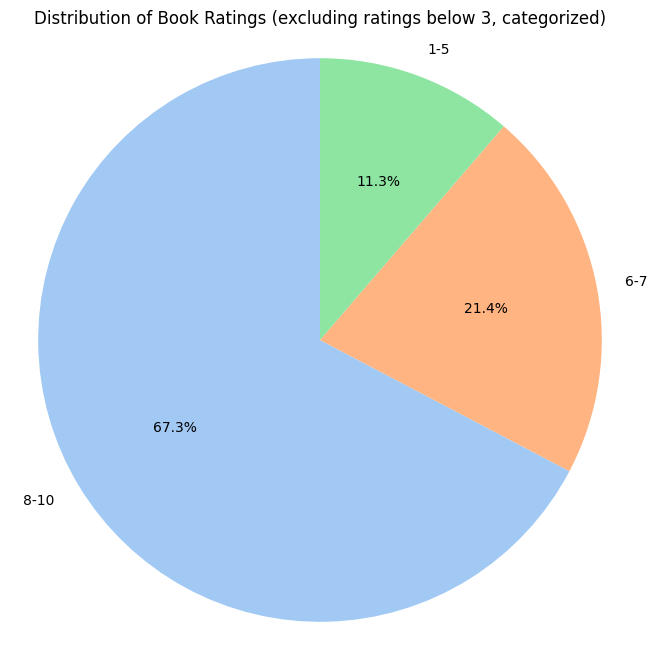

In [99]:
# prompt: The Pie Chart of Rating Dataset dont add the rating below three using seaborn and devide them to 1-5, 6-7, 8-10

# Assuming 'final_rating' DataFrame is already created as in your provided code.

import matplotlib.pyplot as plt
import seaborn as sns

# Define rating bins
bins = [1, 5, 7, 10]
labels = ['1-5', '6-7', '8-10']

# Filter out ratings below 3
filtered_ratings = final_rating[final_rating['rating'] >= 3]

# Categorize ratings into bins
filtered_ratings['rating_category'] = pd.cut(filtered_ratings['rating'], bins=bins, labels=labels, right=True, include_lowest=True)


# Calculate the distribution of the categorized ratings
rating_category_counts = filtered_ratings['rating_category'].value_counts()

# Create the pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")  # Use a pastel color palette
plt.pie(rating_category_counts, labels=rating_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Ratings (excluding ratings below 3, categorized)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [88]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts/model.pkl'

# Testing model

In [89]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [91]:
book_name = "The Cradle Will Fall"
recommend_book(book_name)

You searched 'The Cradle Will Fall'

The suggestion books are: 

Exclusive
Eyes of a Child
Jacob Have I Loved
Fine Things
The Long Road Home


In [101]:
# prompt: k-means clustering

from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'book_pivot' DataFrame is already created as in your provided code.
# Replace with your actual DataFrame

# Example usage
kmeans = KMeans(n_clusters=5, random_state=0) # You can adjust the number of clusters as needed
kmeans.fit(book_pivot)

# Add cluster labels to the DataFrame
book_pivot['cluster'] = kmeans.labels_

print(book_pivot.head())

# Now you can analyze the clusters
# For example, find the books in a specific cluster:
cluster_0_books = book_pivot[book_pivot['cluster'] == 0]
print("\nBooks in Cluster 0:")
print(cluster_0_books.index.tolist())

user_id                254  2276  2766  2977  3363  3757  4017  4385  6242  \
title                                                                        
1984                   9.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1st to Die: A Novel    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2nd Chance             0.0  10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4 Blondes              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
84 Charing Cross Road  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

user_id                6251  ...  274061  274301  274308  274808  275970  \
title                        ...                                           
1984                    0.0  ...     0.0     0.0     0.0     0.0     0.0   
1st to Die: A Novel     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2nd Chance              0.0  ...     0.0     0.0     0.0     0.0     0.0   
4 Blondes               0.0  ...     0.0     0.0     0.0     0.0     0.0 

In [103]:
# prompt: train and test the model using k-means clustering

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'book_pivot' DataFrame is already created as in your provided code.
# Replace with your actual DataFrame

# Example usage
kmeans = KMeans(n_clusters=5, random_state=0) # You can adjust the number of clusters as needed
kmeans.fit(book_pivot)

# Add cluster labels to the DataFrame
book_pivot['cluster'] = kmeans.labels_

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(book_pivot.drop('cluster', axis=1), book_pivot['cluster'], test_size=0.2, random_state=42)

# Train the KMeans model on the training data
kmeans.fit(X_train)

# Make predictions on the test data
y_pred = kmeans.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.